In [1]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [2]:
image=cv2.imread('onion.png')
cv2.imshow("Onion",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Onion",gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

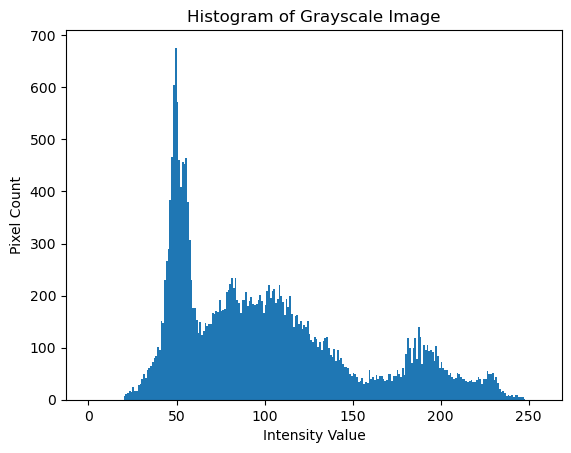

In [4]:
#histogram using built in function by matplotlib 
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.title('Histogram of Grayscale Image')
plt.show() 
#gray_image.ravel(): This function converts the 2D grayscale image (gray_image) into a 1D array. 
#This is necessary because plt.hist() expects a 1D array as input.
#256 is bins
#[0,256] the gray scale range

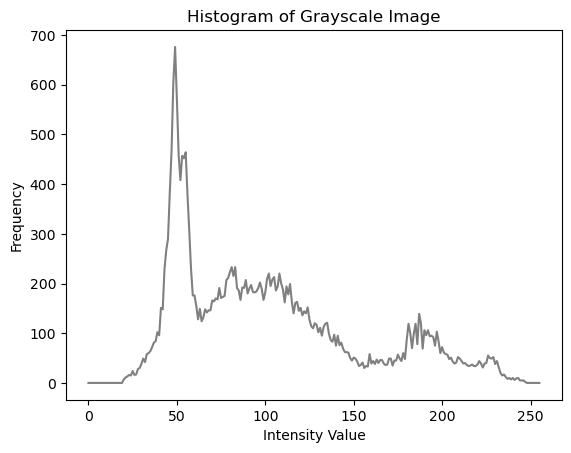

In [5]:
#histogram using built in function by opencv
histogram = cv2.calcHist([gray_img],[0],None,[256], [0, 256])

# Plot the histogram
plt.plot(histogram, color='gray')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()
#The first parameter [image] is a list containing the image.
#The second parameter [0] specifies the channel (0 for grayscale).
#The third parameter None indicates that no mask is used.
#The fourth parameter [256] specifies the number of bins.
#The fifth parameter [0, 256] specifies the range of intensity values.

In [11]:
#histogram of 3 channel differently
b=image[:,:,0]
g=image[:,:,1]

In [8]:
b 

array([[64, 66, 64, ..., 74, 72, 70],
       [66, 64, 64, ..., 75, 77, 77],
       [61, 60, 64, ..., 70, 72, 74],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

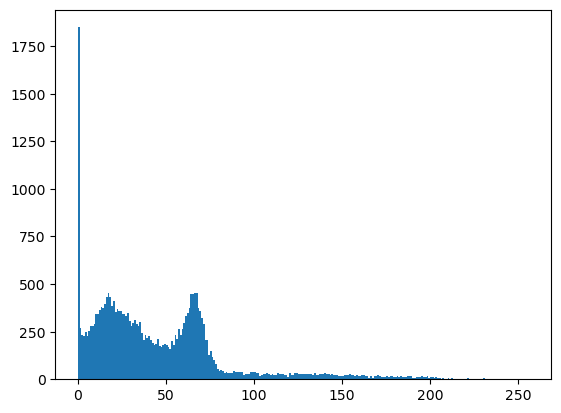

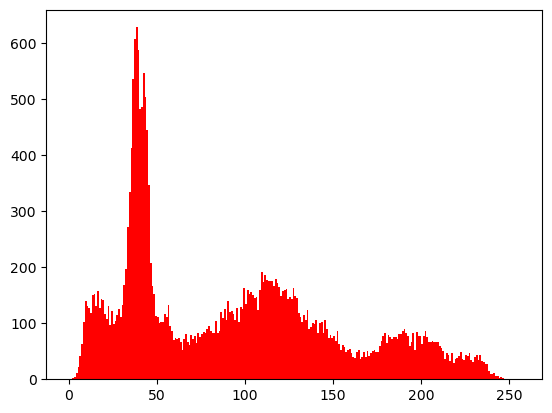

In [15]:
plt.figure()
plt.hist(b.ravel(),256,[0,256]) 
plt.figure() 
plt.hist(g.ravel(),256,[0,256],color='red')  
plt.show( )

Text(0, 0.5, 'Pixel')

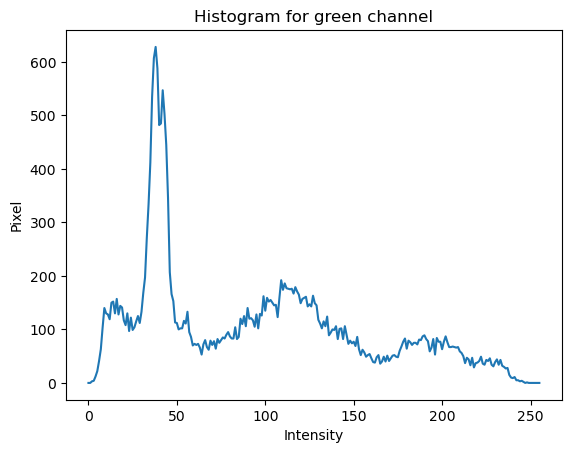

In [17]:
histogram=cv2.calcHist([g.ravel()],[0],None,[256],[0,256]) 
plt.plot(histogram)
plt.title('Histogram for green channel')
plt.xlabel('Intensity')
plt.ylabel('Pixel')

# Histogram without builtin function

In [22]:
#create an array
histogram=np.zeros(256)
for i in range (gray_img.shape[0]):
    for j in range (gray_img.shape[1]):
        intensity=gray_img[i][j]
        histogram[intensity]+=1


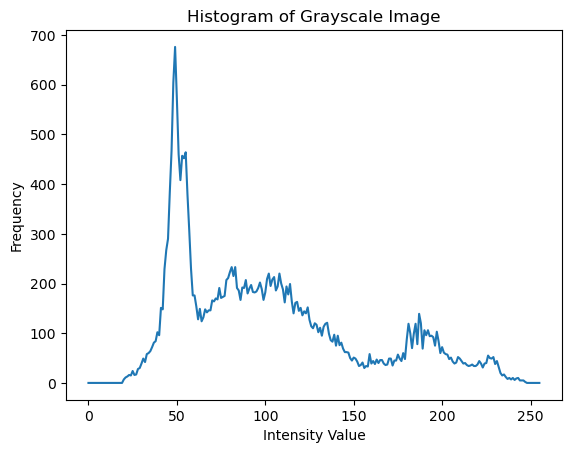

In [24]:
plt.plot(histogram) 
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()

In [26]:
#To display frequency count
for i, count in enumerate(histogram):
    print(f"Intensity value {i}: {count} pixels")

Intensity value 0: 0.0 pixels
Intensity value 1: 0.0 pixels
Intensity value 2: 0.0 pixels
Intensity value 3: 0.0 pixels
Intensity value 4: 0.0 pixels
Intensity value 5: 0.0 pixels
Intensity value 6: 0.0 pixels
Intensity value 7: 0.0 pixels
Intensity value 8: 0.0 pixels
Intensity value 9: 0.0 pixels
Intensity value 10: 0.0 pixels
Intensity value 11: 0.0 pixels
Intensity value 12: 0.0 pixels
Intensity value 13: 0.0 pixels
Intensity value 14: 0.0 pixels
Intensity value 15: 0.0 pixels
Intensity value 16: 0.0 pixels
Intensity value 17: 0.0 pixels
Intensity value 18: 0.0 pixels
Intensity value 19: 0.0 pixels
Intensity value 20: 7.0 pixels
Intensity value 21: 11.0 pixels
Intensity value 22: 13.0 pixels
Intensity value 23: 16.0 pixels
Intensity value 24: 15.0 pixels
Intensity value 25: 24.0 pixels
Intensity value 26: 16.0 pixels
Intensity value 27: 17.0 pixels
Intensity value 28: 28.0 pixels
Intensity value 29: 30.0 pixels
Intensity value 30: 39.0 pixels
Intensity value 31: 49.0 pixels
Intensi

# Histogram Equalization

In [27]:
cv2.imshow("Onion",gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
hist_eq=cv2.equalizeHist(gray_img)
histogram_eq=cv2.calcHist([hist_eq],[0],None,[256],[0,256])
histogram=cv2.calcHist([gray_img],[0],None,[256],[0,256])  

In [40]:
cv2.imshow("Original",gray_img)
cv2.imshow("hist_eq",hist_eq)
cv2.waitKey(0)
cv2.destroyAllWindows() 

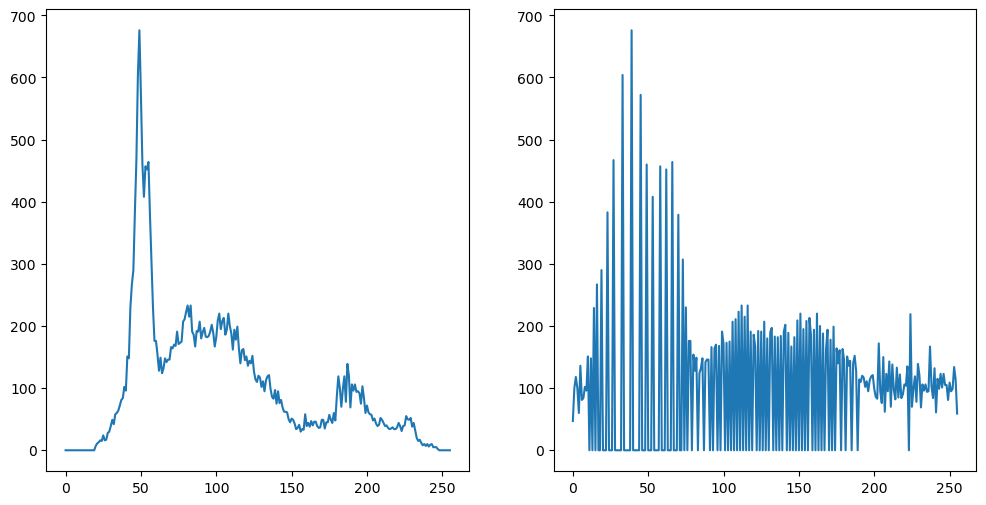

In [39]:
plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1)
plt.plot(histogram)
plt.subplot(1,2,2)
plt.plot(histogram_eq) 

# Histogram Equalization without built In function

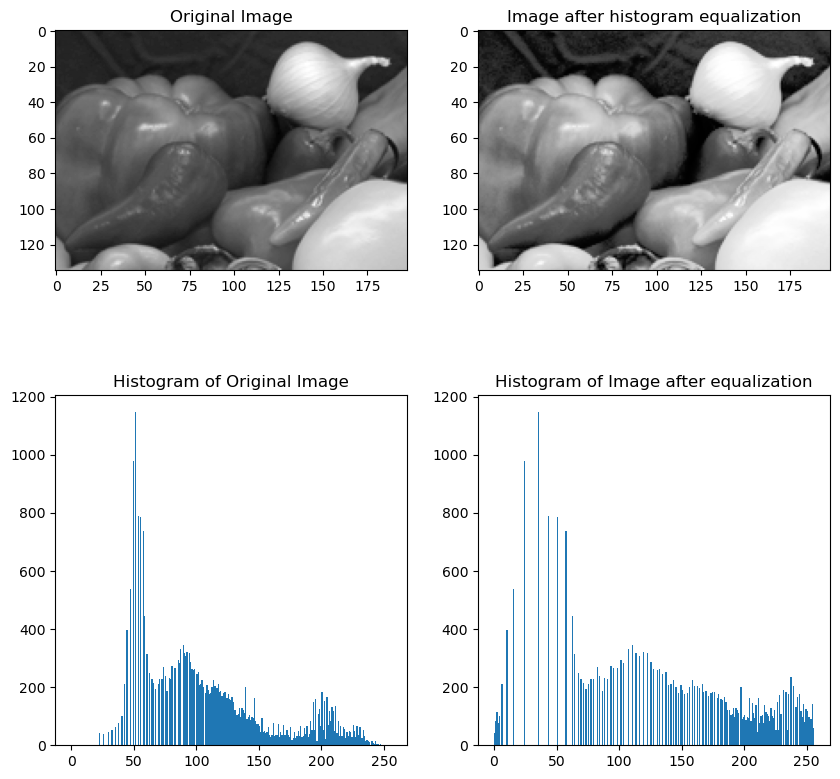

In [61]:
# Read the input image
I = cv2.imread('onion.png', cv2.IMREAD_GRAYSCALE)

# Create an empty image for the output
HIm = np.zeros_like(I)

# Initialize arrays for storing histogram data
freq = np.zeros(256)   # array to store frequency of each pixel value
probf = np.zeros(256)  # array to store probability of each pixel value
probc = np.zeros(256)  # array to store cumulative probability of each pixel value
cum = np.zeros(256)    # array to store cumulative sum of pixel frequencies
output = np.zeros(256) # array to store equalized pixel values

# Calculate the histogram data
numofpixels = I.shape[0] * I.shape[1]
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        # Get the pixel value at (i, j)
        value = I[i, j]
        
        # Increment the frequency of this pixel value in the freq array
        freq[value] += 1
        
        # Calculate the probability of this pixel value
        probf[value] = freq[value] / numofpixels

# Calculate the cumulative distribution function and equalized pixel values
sum = 0
no_bins = 255
for i in range(256):
    # Calculate the cumulative sum of pixel frequencies
    sum += freq[i]
    cum[i] = sum
    
    # Calculate the cumulative probability of each pixel value
    probc[i] = cum[i] / numofpixels
    
    # Calculate the equalized pixel value for this pixel value
    output[i] = round(probc[i] * no_bins)
    

# Replace each pixel value in the input image with its corresponding equalized value
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        # Get the pixel value at (i, j)
        pixel_value = I[i, j]
        
        # Get the equalized pixel value for this pixel value from the output array
        equalized_value = output[pixel_value]
        
        # Set the pixel value at (i, j) in the output image to its equalized value
        HIm[i, j] = equalized_value

# Display the equalized image
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.hist(I.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Original Image')

plt.subplot(2, 2, 2)
plt.imshow(HIm, cmap='gray')
plt.title('Image after histogram equalization')

plt.subplot(2, 2, 4)
plt.hist(HIm.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Image after equalization')

plt.show()

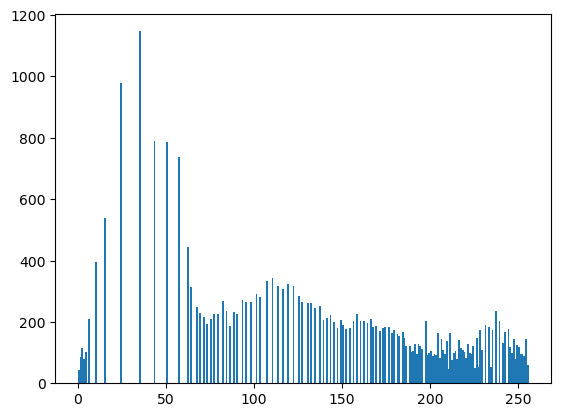

In [66]:
histo=plt.hist(HIm.ravel(),bins=256,range=[0,256])
    